In [234]:
# 1) EDA processes
# a. Import Libraries

import pandas as pd
import matplotlib.pyplot as plt

In [235]:
# b. Loading the Data

salary = pd.read_csv("salary_data.csv")

In [236]:
# c. Checking the first 5 rows

salary.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020.0,Data Scientist,Mid,FT,DE,L,0.0,76227.0
1,2020.0,Machine Learning Scientist,Senior,FT,JP,S,0.0,248257.0
2,2020.0,Big Data Engineer,Senior,FT,GB,M,50.0,104100.0
3,2020.0,Product Data Analyst,Mid,FT,HN,S,0.0,19097.0
4,2020.0,Machine Learning Engineer,Senior,FT,US,L,50.0,143225.0


In [237]:
# d. Check the information

salary.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          607 non-null    float64
 1   Designation           600 non-null    object 
 2   Experience            592 non-null    object 
 3   Employment_Status     579 non-null    object 
 4   Employee_Location     567 non-null    object 
 5   Company_Size          602 non-null    object 
 6   Remote_Working_Ratio  603 non-null    float64
 7   Salary_USD            598 non-null    float64
dtypes: float64(3), object(5)
memory usage: 38.3+ KB


In [238]:
# e. Count the value of the categorical data

salary["Designation"].value_counts()

Designation
Data Scientist                              140
Data Engineer                               131
Data Analyst                                 96
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
AI Scientist                                  7
Principal Data Scientist                      7
Data Science Consultant                       7
Data Analytics Manager                        7
Director of Data Science                      7
BI Data Analyst                               6
ML Engineer                                   6
Lead Data Engineer                            6
Computer Vision Engineer                      6
Business Data Analyst                         5
Applied Data Scientist                        5
Head of Data                

In [239]:
salary["Experience"].value_counts()

Experience
Senior       273
Mid          210
Entry         83
Executive     26
Name: count, dtype: int64

In [240]:
salary["Employment_Status"].value_counts()

Employment_Status
FT    561
PT      9
CT      5
FL      4
Name: count, dtype: int64

In [241]:
salary["Employee_Location"].value_counts()

Employee_Location
US    308
GB     40
CA     28
IN     27
DE     23
FR     18
ES     15
GR     12
JP      7
PT      6
PK      6
BR      6
NL      5
RU      4
PL      4
IT      4
VN      3
TR      3
AU      3
DK      2
MX      2
AT      2
HU      2
SI      2
RO      2
BE      2
SG      2
AE      2
CN      1
HN      1
NZ      1
PH      1
NG      1
MT      1
CL      1
IR      1
UA      1
IQ      1
BG      1
KE      1
MD      1
CO      1
HK      1
PR      1
JE      1
CZ      1
RS      1
AR      1
DZ      1
MY      1
TN      1
EE      1
BO      1
IE      1
CH      1
Name: count, dtype: int64

In [242]:
salary["Company_Size"].value_counts()

Company_Size
M    326
L    194
S     82
Name: count, dtype: int64

In [243]:
# d. Describe the data

salary.describe()

,Working_Year,Remote_Working_Ratio,Salary_USD
count,607.000000,603.000000,598.000000
mean,2021.405272,70.729685,114379.140468
std,0.692133,40.774865,98496.025306
min,2020.000000,0.000000,300.000000
25%,2021.000000,50.000000,60074.000000
50%,2022.000000,100.000000,98271.000000
75%,2022.000000,100.000000,143225.000000
max,2022.000000,100.000000,800000.000000


Experience
Entry         58717.405063
Executive    210539.760000
Mid           88673.019231
Senior       134918.273063
Name: Salary_USD, dtype: float64


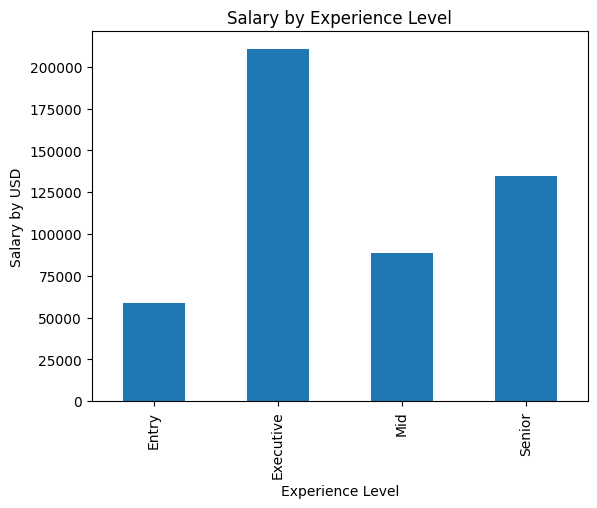

In [244]:
# 2. Visualize the salary by experience level.

exp = salary.groupby("Experience")["Salary_USD"].mean()
print(exp)

exp.plot(kind="bar")
plt.title("Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary by USD")
plt.show()

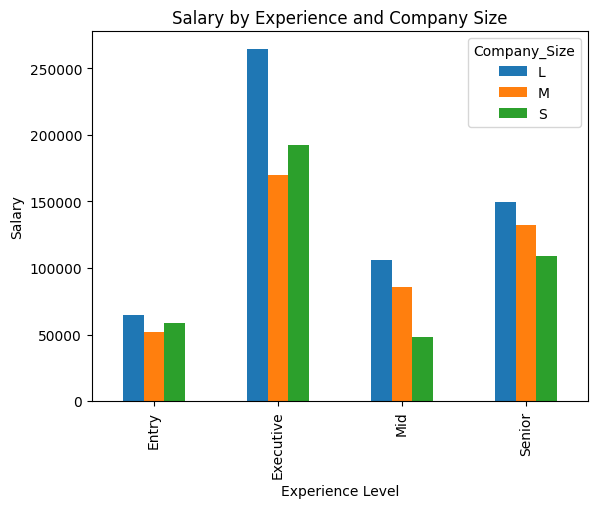

In [245]:
# 3. Visualize the data using sub-group.

salary.groupby(["Experience","Company_Size"])["Salary_USD"].mean().unstack().plot.bar()
plt.title("Salary by Experience and Company Size")
plt.xlabel("Experience Level")
plt.ylabel("Salary")
plt.show()

In [246]:
# 4. Count the missing values.
salary.isna().sum()

Working_Year             3
Designation             10
Experience              18
Employment_Status       31
Employee_Location       43
Company_Size             8
Remote_Working_Ratio     7
Salary_USD              12
dtype: int64

In [247]:
#5. Drop the missing values.
threshold = len(salary) * 0.05
print(threshold)

dropcols = salary.columns[salary.isna().sum() <= threshold]
print(dropcols)

salary.dropna(subset=dropcols, inplace=True)

30.5
Index(['Working_Year', 'Designation', 'Experience', 'Company_Size',
       'Remote_Working_Ratio', 'Salary_USD'],
      dtype='object')


In [248]:
salary.isna().sum()

Working_Year             0
Designation              0
Experience               0
Employment_Status       25
Employee_Location       37
Company_Size             0
Remote_Working_Ratio     0
Salary_USD               0
dtype: int64

In [249]:
# 6) Impute using the summary statistics.

missingcols = salary.columns[salary.isna().sum() > 0]

for col in missingcols:  
    salary[col] = salary[col].fillna(salary[col].mode()[0])

print(missingcols)

Index(['Employment_Status', 'Employee_Location'], dtype='object')


In [250]:
salary.isna().sum()

Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Employee_Location       0
Company_Size            0
Remote_Working_Ratio    0
Salary_USD              0
dtype: int64

In [251]:
#7. Impute by sub-group.

# Salary_USD has no missing values after dropping rows.